In [94]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix  
import seaborn as sns
sns.set()

In [244]:
ds= pd.read_csv("top10s_.csv")

In [162]:
# X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
X = ds[['year','bpm','nrgy','dnce','dB','live','val','dur','acous','spch','pop']]
# y= 'top genre'
# y= top10s.loc[:, 'top genre']
# pd.get_dummies(pd.Series(list('top genre')), drop_first=True)

In [220]:
y= ds.loc[:, 'top genre']

end= ['pop','hop']
ds['new_column'] = np.where(ds['top genre'].str.endswith(tuple(end)),
                            'Pop', 
                            ds['top genre'])

start= ['edm','trap','electro','house','brostep','complextro']
ds['new_column1'] = np.where(ds['new_column'].str.startswith(tuple(start)),
                            'Electronic', 
                            ds['new_column'])

contains= ['boy band','british soul','big room','neo mellow','canadian contemporary r&b','australian dance', 'atl hip hop',
           'latin','permanent wave','tropical house','escape room','downtempo','chicago rap','contemporary country',
           'alternative r&b','irish singer-songwriter','metropopolis','celtic rock','hollywood','canadian latin',
           'belgian edm','alaska indie']
                                                           
ds['new_column2']= np.where(ds['new_column1'].str.startswith(tuple(contains)),
                            'Misc', 
                            ds['new_column1'])


y = pd.get_dummies('new_column2', drop_first=True)
y= ds.loc[:, 'new_column2']
y.value_counts()


Pop           498
Misc           86
Electronic     19
Name: new_column2, dtype: int64

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [222]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [223]:
y_pred = knn.predict(X_test)

In [246]:
confusion_matrix(y_test, y_pred, labels= ['Pop','Electronic','Misc'])

array([[116,   0,   4],
       [  8,   0,   0],
       [ 20,   2,   1]])

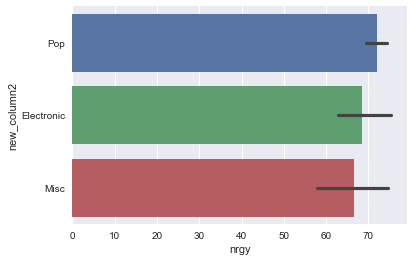

In [227]:
sns.barplot(
    x='nrgy',
    y='new_column2',
    data=X_test.join(y_test, how='outer')
)

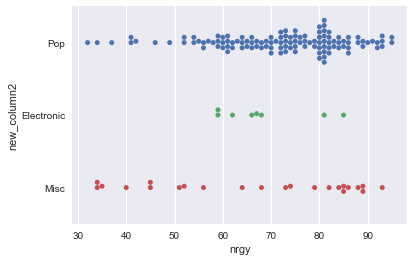

In [228]:
sns.swarmplot(
    x='nrgy',
    y='new_column2'
    data=X_test.join(y_test, how='outer')
)